In [14]:
import pandas as pd
import sklearn
import seaborn as sns
print(sklearn.__version__)

1.6.1


In [16]:
#Librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
# Cargar el archivo CSV
df = pd.read_csv("clientes_preprocesamiento.csv")

# Mostrar las primeras filas del DataFrame
print(df.head())

   ID  Edad     Genero  Ciudad  Ingresos_Mensuales  Frecuencia_Compra  \
0   1   NaN  Masculino  Cuenca              2946.0                  3   
1   2   NaN        NaN     NaN              1340.0                  8   
2   3   NaN   Femenino  Ambato              1052.0                  8   
3   4   NaN        NaN   Quito              2321.0                  2   
4   5  35.0        NaN   Quito              1522.0                  2   

   Ultima_Compra_dias  Compra  
0                 103       0  
1                  72       0  
2                 173       1  
3                   4       0  
4                 166       1  


In [6]:
# Realizar un backup para trabajar sobre este 
df_copia = df.copy()

In [7]:
#Recolección y exploración de datos
# Ver columnas y tipos de datos
print(df_copia.info())

# Ver primeros registros
print(df_copia.head())

# Estadísticas generales de columnas numéricas
print(df_copia.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3000 non-null   int64  
 1   Edad                1001 non-null   float64
 2   Genero              1981 non-null   object 
 3   Ciudad              2368 non-null   object 
 4   Ingresos_Mensuales  2968 non-null   float64
 5   Frecuencia_Compra   3000 non-null   int64  
 6   Ultima_Compra_dias  3000 non-null   int64  
 7   Compra              3000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 187.6+ KB
None
   ID  Edad     Genero  Ciudad  Ingresos_Mensuales  Frecuencia_Compra  \
0   1   NaN  Masculino  Cuenca              2946.0                  3   
1   2   NaN        NaN     NaN              1340.0                  8   
2   3   NaN   Femenino  Ambato              1052.0                  8   
3   4   NaN        NaN   Quito             

In [8]:
# Contabiliar el número de nulos por columna para la posterior limpieza
df_copia.columns
df_copia.isnull().sum()

ID                       0
Edad                  1999
Genero                1019
Ciudad                 632
Ingresos_Mensuales      32
Frecuencia_Compra        0
Ultima_Compra_dias       0
Compra                   0
dtype: int64

In [9]:
# Reemplazar valores nulos en todo el DataFrame
df_copia.fillna("sin info", inplace=True)
df_copia

C:\Users\Windows\AppData\Local\Temp\ipykernel_10828\2109874915.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sin info' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copia.fillna("sin info", inplace=True)


,ID,Edad,Genero,Ciudad,Ingresos_Mensuales,Frecuencia_Compra,Ultima_Compra_dias,Compra
0,1,sin info,Masculino,Cuenca,2946.0,3,103,0
1,2,sin info,sin info,sin info,1340.0,8,72,0
2,3,sin info,Femenino,Ambato,1052.0,8,173,1
3,4,sin info,sin info,Quito,2321.0,2,4,0
4,5,35.0,sin info,Quito,1522.0,2,166,1
...,...,...,...,...,...,...,...,...
2995,2996,42.0,sin info,Guayaquil,1898.0,2,168,1
2996,2997,sin info,sin info,Ambato,1570.0,7,21,1
2997,2998,sin info,sin info,Quito,3812.0,9,146,0
2998,2999,sin info,Masculino,Cuenca,3083.0,15,112,1


In [10]:
# Verificar valores únicos antes de codificar
print(df["Ciudad"].unique())  # Verifica si "sin info" aparece como categoría

# Opcional: reemplazar "sin info" por una categoría válida
df["Ciudad"].replace("sin info", "Desconocido", inplace=True)  # O elimínala si prefieres

# Convertir Ciudad a tipo string (por si acaso)
df["Ciudad"] = df["Ciudad"].astype(str)

# Codificar la variable de entrada (Ciudad) con OneHotEncoder
encoder_ciudad = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ciudad_encoded = encoder_ciudad.fit_transform(df[["Ciudad"]])

# Convertir a DataFrame y unirlo con el original
ciudad_df = pd.DataFrame(ciudad_encoded, columns=encoder_ciudad.get_feature_names_out(["Ciudad"]))
df = pd.concat([df, ciudad_df], axis=1)

# Verificar columnas generadas
print(df.head())

['Cuenca' nan 'Ambato' 'Quito' 'Guayaquil']
   ID  Edad     Genero  Ciudad  Ingresos_Mensuales  Frecuencia_Compra  \
0   1   NaN  Masculino  Cuenca              2946.0                  3   
1   2   NaN        NaN     nan              1340.0                  8   
2   3   NaN   Femenino  Ambato              1052.0                  8   
3   4   NaN        NaN   Quito              2321.0                  2   
4   5  35.0        NaN   Quito              1522.0                  2   

   Ultima_Compra_dias  Compra  Ciudad_Ambato  Ciudad_Cuenca  Ciudad_Guayaquil  \
0                 103       0            0.0            1.0               0.0   
1                  72       0            0.0            0.0               0.0   
2                 173       1            1.0            0.0               0.0   
3                   4       0            0.0            0.0               0.0   
4                 166       1            0.0            0.0               0.0   

   Ciudad_Quito  Ciudad_nan  


C:\Users\Windows\AppData\Local\Temp\ipykernel_10828\3853752562.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ciudad"].replace("sin info", "Desconocido", inplace=True)  # O elimínala si prefieres


In [11]:
# Codificar la variable objetivo (Género)
encoder_genero = LabelEncoder()
df["Genero_Codificado"] = encoder_genero.fit_transform(df["Genero"])  # Femenino = 0, Masculino = 1, Desconocido = 2

# Codificar la variable de entrada (Ciudad) con OneHotEncoder
encoder_ciudad = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ciudad_encoded = encoder_ciudad.fit_transform(df[["Ciudad"]])

# Convertir a DataFrame y unirlo con el original
ciudad_df = pd.DataFrame(ciudad_encoded, columns=encoder_ciudad.get_feature_names_out(["Ciudad"]))
df = pd.concat([df, ciudad_df], axis=1)

# Definir X e Y
X = df[ciudad_df.columns]  # Variables predictoras
Y = df["Genero_Codificado"]  # Variable objetivo

# Dividir datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar modelo KNN con k=5 vecinos
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, Y_train)

# Predicción
predicciones = modelo_knn.predict(X_test)

# Evaluar precisión
precision = accuracy_score(Y_test, predicciones)
print(f"Precisión del modelo KNN: {precision:.2f}")

Precisión del modelo KNN: 0.32


In [33]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import OneHotEncoder  # Para transformar columnas categóricas en numéricas
from sklearn.ensemble import RandomForestClassifier  # Modelo de clasificación
from sklearn.metrics import accuracy_score, f1_score  # Para evaluar el desempeño del modelo

# Cargar los datos
df = pd.read_csv("clientes_preprocesamiento.csv")  # Asegúrate de que el archivo exista

# Crear una copia del DataFrame original
df_copia = df.copy()

# Aplicar OneHotEncoder a la columna categórica "Ciudad"
encoder = OneHotEncoder()
ciudad_encoded = encoder.fit_transform(df_copia[["Ciudad"]])  

# Convertir la transformación a DataFrame con nombres de columnas
ciudad_df = pd.DataFrame(ciudad_encoded.toarray(), columns=encoder.get_feature_names_out(["Ciudad"]))

# Concatenar las nuevas columnas codificadas con el DataFrame original
df_copia = pd.concat([df_copia, ciudad_df], axis=1)

# Eliminar la columna original "Ciudad"
df_copia.drop(columns=["Ciudad"], inplace=True)

# **Eliminar o rellenar valores NaN**
df_copia.dropna(inplace=True)  # Elimina filas con valores NaN

# Definir variables predictoras (X) y variable objetivo (Y)
X = df_copia.drop(columns=["Genero"])  # Tomar todas las columnas excepto "Genero"
Y = df_copia["Genero"]  # Variable objetivo

# Dividir datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar modelo de Random Forest
modelo_randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_randomforest.fit(X_train, Y_train)  # Ajustar el modelo a los datos de entrenamiento

# Predicción
predicciones = modelo_randomforest.predict(X_test)

# Evaluar precisión (accuracy)
precision = accuracy_score(Y_test, predicciones)
print(f"Precisión del modelo: {precision:.2f}")

# Evaluar F1-score
f1 = f1_score(Y_test, predicciones, average="weighted")  
print(f"F1-score del modelo: {f1:.2f}")

Precisión del modelo: 0.44
F1-score del modelo: 0.44


In [12]:
# Sample DataFrame (assuming df is already loaded)
df_copia = df.copy()

# Codificar la variable objetivo (Género)
encoder_genero = LabelEncoder()
df_copia["Genero"] = encoder_genero.fit_transform(df["Genero"])  # Femenino = 0, Masculino = 1

# Codificar la variable de entrada (Ciudad) con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
ciudad_encoded = encoder.fit_transform(df[["Ciudad"]])

# Convertir a DataFrame y unirlo con el original
ciudad_df = pd.DataFrame(ciudad_encoded, columns=encoder.get_feature_names_out(["Ciudad"]))
df_copia = pd.concat([df_copia, ciudad_df], axis=1)

# Debugging: Verificar columnas
print("Columns in df:", df.columns)
print("Columns in ciudad_df:", ciudad_df.columns)
print("Columns in df_copia:", df_copia.columns)

Columns in df: Index(['ID', 'Edad', 'Genero', 'Ciudad', 'Ingresos_Mensuales',
       'Frecuencia_Compra', 'Ultima_Compra_dias', 'Compra', 'Ciudad_Ambato',
       'Ciudad_Cuenca', 'Ciudad_Guayaquil', 'Ciudad_Quito', 'Ciudad_nan',
       'Genero_Codificado', 'Ciudad_Ambato', 'Ciudad_Cuenca',
       'Ciudad_Guayaquil', 'Ciudad_Quito', 'Ciudad_nan'],
      dtype='object')
Columns in ciudad_df: Index(['Ciudad_Ambato', 'Ciudad_Cuenca', 'Ciudad_Guayaquil', 'Ciudad_Quito',
       'Ciudad_nan'],
      dtype='object')
Columns in df_copia: Index(['ID', 'Edad', 'Genero', 'Ciudad', 'Ingresos_Mensuales',
       'Frecuencia_Compra', 'Ultima_Compra_dias', 'Compra', 'Ciudad_Ambato',
       'Ciudad_Cuenca', 'Ciudad_Guayaquil', 'Ciudad_Quito', 'Ciudad_nan',
       'Genero_Codificado', 'Ciudad_Ambato', 'Ciudad_Cuenca',
       'Ciudad_Guayaquil', 'Ciudad_Quito', 'Ciudad_nan', 'Ciudad_Ambato',
       'Ciudad_Cuenca', 'Ciudad_Guayaquil', 'Ciudad_Quito', 'Ciudad_nan'],
      dtype='object')


In [25]:
# Manejo de valores nulos
df["Genero"].fillna("Desconocido", inplace=True)
df["Ciudad"].fillna("Desconocido", inplace=True)

# Codificar la variable objetivo (Género)
encoder_genero = LabelEncoder()
df["Genero_Codificado"] = encoder_genero.fit_transform(df["Genero"])  # Femenino = 0, Masculino = 1, Desconocido = 2

# Codificar la variable de entrada (Ciudad) con OneHotEncoder
encoder_ciudad = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ciudad_encoded = encoder_ciudad.fit_transform(df[["Ciudad"]])

# Convertir a DataFrame y unirlo con el original
ciudad_df = pd.DataFrame(ciudad_encoded, columns=encoder_ciudad.get_feature_names_out(["Ciudad"]))
df = pd.concat([df, ciudad_df], axis=1)

# Definir X e Y
X = df[ciudad_df.columns]  # Variables predictoras
Y = df["Genero_Codificado"]  # Variable objetivo

# Dividir datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar modelo KNN con k=5 vecinos
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, Y_train)

# Predicción
predicciones = modelo_knn.predict(X_test)

# Evaluar precisión
precision = accuracy_score(Y_test, predicciones)
print(f"Precisión del modelo KNN: {precision:.2f}")

Precisión del modelo KNN: 0.32


C:\Users\Windows\AppData\Local\Temp\ipykernel_10828\447556439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Genero"].fillna("Desconocido", inplace=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_10828\447556439.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Error cuadrático medio de la regresión lineal: 0.67


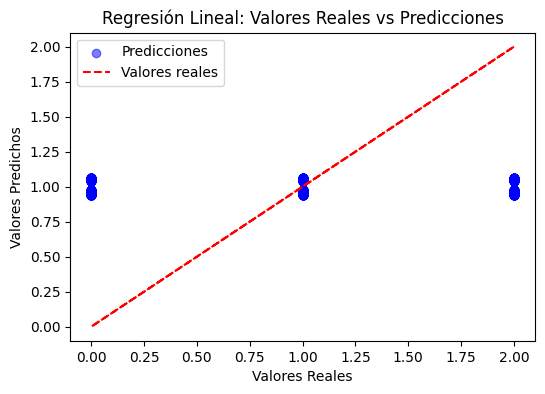

In [ ]:
# Definir X (variables predictoras) e Y (objetivo)
X = df[ciudad_df.columns]  # Variables categóricas de Ciudad
Y = df["Genero_Codificado"]  # Variable numérica

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar modelo de Regresión Lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

# Predicción
predicciones = modelo_regresion.predict(X_test)

# Evaluar el modelo con el error cuadrático medio
error = mean_squared_error(Y_test, predicciones)
print(f"Error cuadrático medio de la regresión lineal: {error:.2f}")


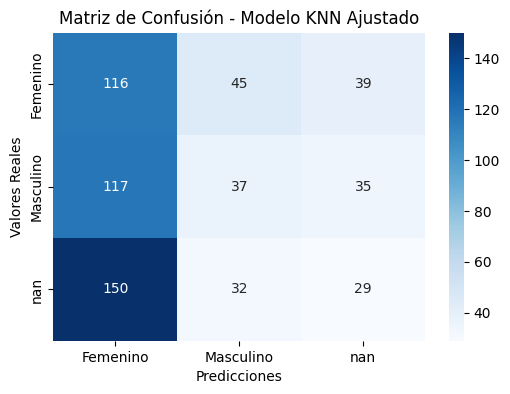

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Normalizar características para KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar KNN con k=3 vecinos
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train_scaled, Y_train)

# Predicción y conversión a valores enteros
predicciones = modelo_knn.predict(X_test_scaled)
predicciones = predicciones.round().astype(int)  # Convertir a enteros

# Obtener la matriz de confusión
matriz_confusion = confusion_matrix(Y_test, predicciones)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=encoder_genero.classes_, yticklabels=encoder_genero.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión - Modelo KNN Ajustado")
plt.show()

In [22]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import OneHotEncoder  # Para transformar columnas categóricas en numéricas
from sklearn.ensemble import RandomForestClassifier  # Modelo de clasificación
from sklearn.metrics import accuracy_score, f1_score  # Para evaluar el desempeño del modelo

# Cargar los datos
df = pd.read_csv("clientes_preprocesamiento.csv")  # Asegúrate de que el archivo exista

# Crear una copia del DataFrame original
df_copia = df.copy()

# Aplicar OneHotEncoder a la columna categórica "Ciudad"
encoder = OneHotEncoder()
ciudad_encoded = encoder.fit_transform(df_copia[["Ciudad"]])  

# Convertir la transformación a DataFrame con nombres de columnas
ciudad_df = pd.DataFrame(ciudad_encoded.toarray(), columns=encoder.get_feature_names_out(["Ciudad"]))

# Concatenar las nuevas columnas codificadas con el DataFrame original
df_copia = pd.concat([df_copia, ciudad_df], axis=1)

# Eliminar la columna original "Ciudad"
df_copia.drop(columns=["Ciudad"], inplace=True)

# *Eliminar o rellenar valores NaN*
df_copia.dropna(inplace=True)  # Elimina filas con valores NaN

# Definir variables predictoras (X) y variable objetivo (Y)
X = df_copia.drop(columns=["Genero"])  # Tomar todas las columnas excepto "Genero"
Y = df_copia["Genero"]  # Variable objetivo

# Dividir datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, Y_train)  # Ajustar el modelo a los datos de entrenamiento

# Predicción
predicciones = modelo.predict(X_test)

# Evaluar precisión (accuracy)
precision = accuracy_score(Y_test, predicciones)
print(f"Precisión del modelo: {precision:.2f}")

# Evaluar F1-score
f1 = f1_score(Y_test, predicciones, average="weighted")  
print(f"F1-score del modelo: {f1:.2f}")

Precisión del modelo: 0.44
F1-score del modelo: 0.44


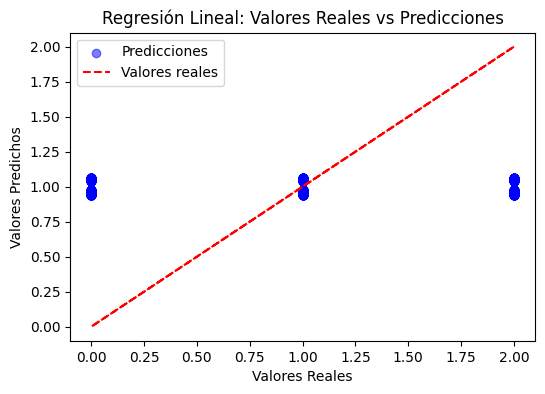

In [27]:
# Crear gráfico de dispersión
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, predicciones, color="blue", alpha=0.5, label="Predicciones")
plt.plot(Y_test, Y_test, color="red", linestyle="dashed", label="Valores reales")  # Línea de referencia ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Regresión Lineal: Valores Reales vs Predicciones")
plt.legend()
plt.show()

F1-score Regresión Logística: 0.45
F1-score Random Forest: 0.51


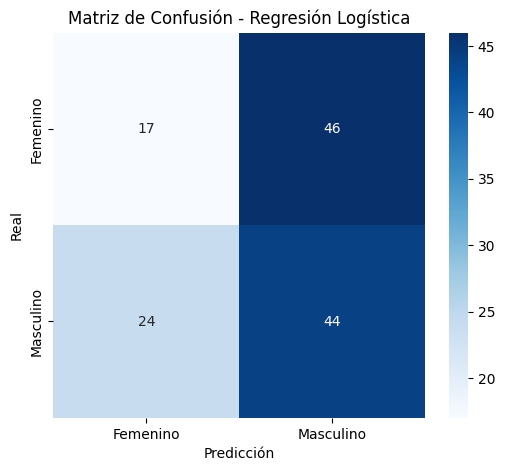

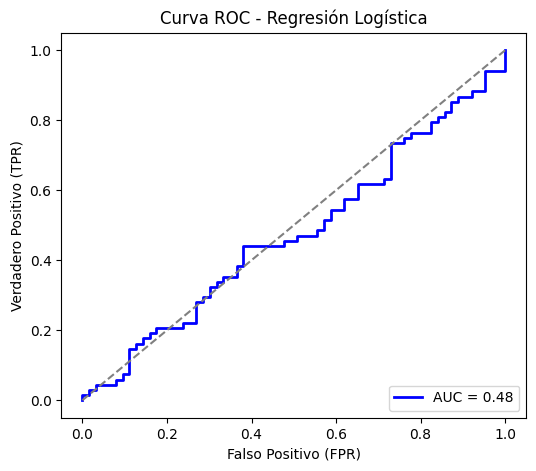

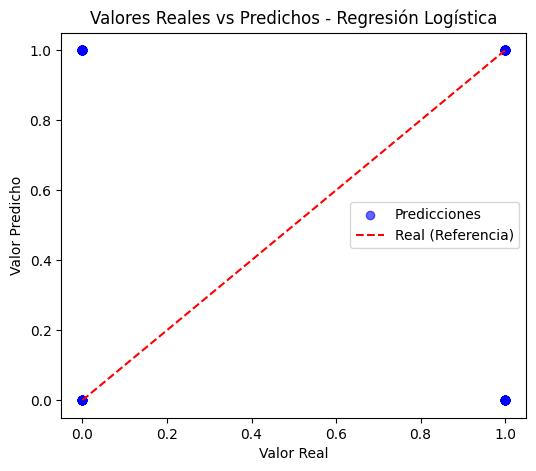

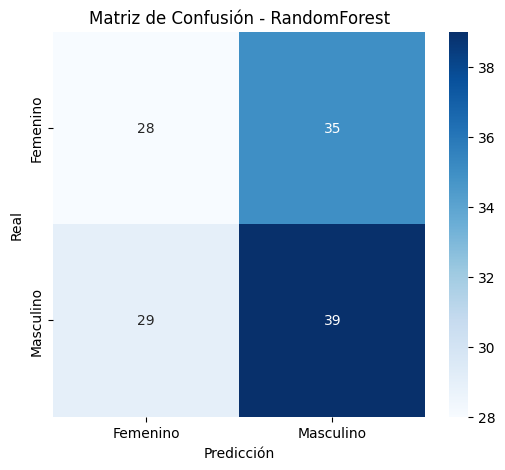

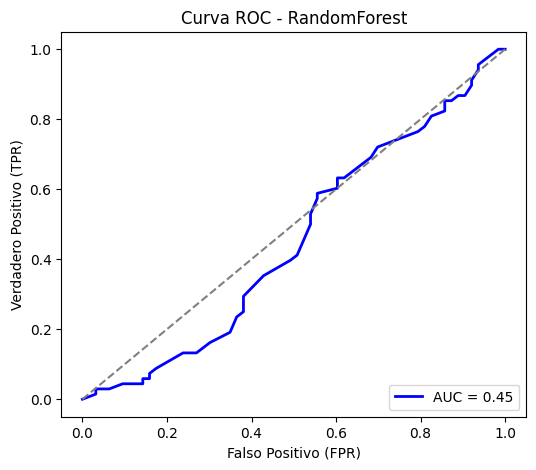

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score

# Cargar los datos
df = pd.read_csv("clientes_preprocesamiento.csv")  # Ajusta el nombre del archivo si es necesario

# **Eliminar la columna ID**, ya que no aporta información predictiva
df_copia = df.drop(columns=["ID"])

# Aplicar OneHotEncoder a la columna categórica "Ciudad"
encoder = OneHotEncoder(handle_unknown="ignore")
ciudad_encoded = encoder.fit_transform(df_copia[["Ciudad"]])
ciudad_df = pd.DataFrame(ciudad_encoded.toarray(), columns=encoder.get_feature_names_out(["Ciudad"]))

# Concatenar las nuevas columnas codificadas con el DataFrame original
df_copia = pd.concat([df_copia, ciudad_df], axis=1)
df_copia.drop(columns=["Ciudad"], inplace=True)  # Eliminar la columna original "Ciudad"

# **Eliminar cualquier fila con valores NaN**
df_copia.dropna(inplace=True)

# **Convertir la variable objetivo "Genero" a valores numéricos**
df_copia["Genero"] = df_copia["Genero"].map({"Femenino": 0, "Masculino": 1})

# Definir las variables predictoras (X) y la variable objetivo (Y)
X = df_copia.drop(columns=["Genero"])  # Todas las columnas excepto "Genero"
Y = df_copia["Genero"]  # Variable objetivo

# **Dividir los datos en conjuntos de entrenamiento y prueba**
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Estandarizar las características numéricas**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Inicializar y entrenar modelos**
modelo_logistico = LogisticRegression(random_state=42, max_iter=500)
modelo_logistico.fit(X_train_scaled, Y_train)

modelo_randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_randomforest.fit(X_train, Y_train)  # No se necesita escalado para RandomForest

# **Evaluación con F1-score**
f1_logistico = f1_score(Y_test, modelo_logistico.predict(X_test_scaled), average="weighted")
f1_randomforest = f1_score(Y_test, modelo_randomforest.predict(X_test), average="weighted")

print(f"F1-score Regresión Logística: {f1_logistico:.2f}")
print(f"F1-score Random Forest: {f1_randomforest:.2f}")

# **Funciones de visualización**
def plot_confusion_matrix(model, X_test, Y_test, title):
    """Genera un heatmap con la matriz de confusión"""
    cm = confusion_matrix(Y_test, model.predict(X_test))

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Femenino", "Masculino"], yticklabels=["Femenino", "Masculino"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(title)
    plt.show()

def plot_roc_curve(model, X_test, Y_test, title):
    """Genera la curva ROC"""
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_prob)
        auc_value = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_value:.2f}")
        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea de referencia
        plt.xlabel("Falso Positivo (FPR)")
        plt.ylabel("Verdadero Positivo (TPR)")
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"El modelo {title} no admite predict_proba(), no se puede calcular la curva ROC.")

def plot_real_vs_predicted(model, X_test, Y_test, title):
    """Genera un gráfico de dispersión entre valores reales y predichos"""
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(6, 5))
    plt.scatter(Y_test, y_pred, alpha=0.6, c="blue", label="Predicciones")
    plt.plot(Y_test, Y_test, color="red", linestyle="--", label="Real (Referencia)")
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Predicho")
    plt.title(title)
    plt.legend()
    plt.show()

# **Graficar resultados**
plot_confusion_matrix(modelo_logistico, X_test_scaled, Y_test, "Matriz de Confusión - Regresión Logística")
plot_roc_curve(modelo_logistico, X_test_scaled, Y_test, "Curva ROC - Regresión Logística")
plot_real_vs_predicted(modelo_logistico, X_test_scaled, Y_test, "Valores Reales vs Predichos - Regresión Logística")

plot_confusion_matrix(modelo_randomforest, X_test, Y_test, "Matriz de Confusión - RandomForest")
plot_roc_curve(modelo_randomforest, X_test, Y_test, "Curva ROC - RandomForest")

In [30]:
import joblib

# Guardar el modelo de Regresión Logística
joblib.dump(modelo_logistico, "modelo_logistico.pkl")

# Guardar el modelo de Random Forest
joblib.dump(modelo_randomforest, "modelo_randomforest.pkl")

print("Modelos guardados exitosamente.")

Modelos guardados exitosamente.


In [35]:
import joblib

# Guardar el modelo de Regresión Logística
joblib.dump(modelo_logistico, "modelo_logistico.pkl")

# Guardar el modelo de Random Forest
joblib.dump(modelo_randomforest, "modelo_randomforest.pkl")

print("Modelos guardados exitosamente.")

Modelos guardados exitosamente.


In [38]:
pip install streamlit

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 989.2 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.9 MB 989.2 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/9.9 MB 838.9 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.9 MB 1.0 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.9 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.9 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.9 MB 1.0 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/9.9 MB 1.0 MB/s eta 0:00:08
   --------- ------------------------------ 2.4/9.9 MB 1.0 MB/s eta 0:00:08
   ---------- ----------------------------- 2.6/9.9 MB 1.0 MB/s eta 0:00:07
   ------------ -----------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import streamlit as st

In [45]:
# Título
st.title("Predicción de Género con Machine Learning")

# Inputs del usuario
ingresos = st.number_input("Ingresos Mensuales", min_value=0, value=5000)
frecuencia = st.number_input("Frecuencia de Compra", min_value=0, value=3)
ult_compra = st.number_input("Última compra (días)", min_value=0, value=10)
modelo_seleccionado = st.selectbox("Seleccione el modelo", ["Regresión Logística", "Random Forest"])

# Crear DataFrame con columnas en el mismo orden que el entrenamiento
datos_usuario = pd.DataFrame([[ingresos, frecuencia, ult_compra]], 
                             columns=["Ingresos_Mensuales", "Frecuencia_Compra", "Ultima_Compra_dias"])

# Cargar modelos
modelo_log = joblib.load("modelo_logistico.pkl")
modelo_rf = joblib.load("modelo_randomforest.pkl")

# Selección del modelo
modelo = modelo_log if modelo_seleccionado == "Regresión Logística" else modelo_rf

# Botón para predecir
if st.button("Predecir"):
    prediccion = modelo.predict(datos_usuario)
    genero = "Masculino" if prediccion[0] == 1 else "Femenino"
    st.success(f"Predicción: {genero}")

2025-05-24 09:48:25.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.026 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.028 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-05-24 09:48:25.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-24 09:48:25.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [44]:
import pandas as pd
import joblib

# Cargar datos
df = pd.read_csv("clientes_preprocesamiento.csv")

# Preprocesamiento: eliminar filas con NaN
df.dropna(inplace=True)

# Asegurarse de que estas tres columnas existan
columnas_necesarias = ["Ingresos_Mensuales", "Frecuencia_Compra", "Ultima_Compra_dias", "Genero"]
df = df[columnas_necesarias]

# Convertir la columna "Genero" a binaria si es texto
if df["Genero"].dtype == "object":
    df["Genero"] = df["Genero"].map({"Femenino": 0, "Masculino": 1})

# Variables predictoras y objetivo
X = df.drop(columns=["Genero"])
Y = df["Genero"]

# División de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entrenar modelos
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, Y_train)

modelo_log = LogisticRegression(max_iter=500)
modelo_log.fit(X_train, Y_train)

# Evaluación
print("Random Forest Accuracy:", accuracy_score(Y_test, modelo_rf.predict(X_test)))
print("Logistic Regression Accuracy:", accuracy_score(Y_test, modelo_log.predict(X_test)))

# Guardar modelos
joblib.dump(modelo_rf, "modelo_randomforest.pkl")
joblib.dump(modelo_log, "modelo_logistico.pkl")

Random Forest Accuracy: 0.43119266055045874
Logistic Regression Accuracy: 0.44954128440366975


['modelo_logistico.pkl']